In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

import os
from dotenv import load_dotenv # add this line

import json

from scipy import stats

In [2]:
# Python program to read
# json file
 
import json
 
# Opening JSON file
f = open("experiment_data/pilot_lakes_scaled.json")
 
# returns JSON object as 
# a dictionary
data = json.load(f)

f.close()

In [3]:
exp_df = pd.DataFrame(list(data))
exp_df = pd.concat([exp_df.drop(['data'], axis=1), exp_df['data'].apply(pd.Series)], axis=1)
exp_df = pd.concat([exp_df.drop(['trials'], axis=1), exp_df['trials'].apply(pd.Series)], axis=1)

In [4]:
exp_df = exp_df[[3, 5, 6]]

exp_df = pd.concat([exp_df.drop([3], axis=1), exp_df[3].apply(pd.Series)], axis=1)
exp_df = pd.concat([exp_df.drop([6], axis=1), exp_df[6].apply(pd.Series)], axis=1)

In [5]:
exp_df = exp_df[[5, 'stimulus_type', 'response']]
exp_df = exp_df.rename(columns={"response": "response_survey"})
exp_df = exp_df.rename(columns={"stimulus_type": "stimulus_category"})


In [6]:
exp_df

,5,stimulus_category,response_survey
0,"{'rt': 8929, 'stimulus': '<div style='float: c...",temp,"{'Temperature': 7, 'Attention': 9, 'Freeze': 7..."
1,"{'rt': 10733, 'stimulus': '<div style='float: ...",temp,"{'Attention': 9, 'Freeze': 7, 'Temperature': 7..."
2,"{'rt': 11547, 'stimulus': '<div style='float: ...",temp,"{'Temperature': 5, 'Freeze': 6, 'Climate': 6, ..."
3,"{'rt': 6669, 'stimulus': '<div style='float: c...",freeze,"{'Temperature': 5, 'Climate': 9, 'Attention': ..."
4,"{'rt': 23257, 'stimulus': '<div style='float: ...",temp,"{'Attention': 9, 'Freeze': 3, 'Climate': 4, 'T..."
...,...,...,...
242,"{'rt': 21434, 'stimulus': '<div style='float: ...",freeze,"{'Attention': 9, 'Climate': 7, 'Freeze': 7, 'T..."
243,"{'rt': 36899, 'stimulus': '<div style='float: ...",temp,"{'Temperature': 3, 'Freeze': 7, 'Attention': 9..."
244,"{'rt': 21492, 'stimulus': '<div style='float: ...",temp,"{'Freeze': 6, 'Temperature': 6, 'Attention': 9..."
245,"{'rt': 29726, 'stimulus': '<div style='float: ...",temp,"{'Attention': 9, 'Climate': 8, 'Freeze': 8, 'T..."


In [7]:
exp_df = pd.concat([exp_df.drop([5], axis=1), exp_df[5].apply(pd.Series)], axis=1)

exp_df = exp_df[['rt', 'stimulus_category', 'stimulus_type', 'response_survey']]
exp_df = exp_df.rename(columns={"stimulus_type": "lake"})

exp_df = pd.concat([exp_df.drop(['response_survey'], axis=1), exp_df['response_survey'].apply(pd.Series)], axis=1)

# keep only entries where subject was paying attention
exp_df = exp_df[exp_df['Attention'] == 9]
exp_df = exp_df[exp_df['rt'] >= 2000]

# add 1 to numerical entries to shift to 1-10 scale
exp_df = pd.concat([exp_df.drop(['stimulus_category', 'lake'], axis=1)+1, exp_df[['stimulus_category','lake']]], axis=1)

In [8]:
exp_df

,rt,Temperature,Attention,Freeze,Climate,stimulus_category,lake
0,8930,8,10,8,9,temp,../img/plots/george_temp.png
1,10734,8,10,8,8,temp,../img/plots/george_temp.png
2,11548,6,10,7,7,temp,../img/plots/grand_traverse_bay_temp.png
3,6670,6,10,8,10,freeze,../img/plots/george_freeze.png
4,23258,5,10,4,5,temp,../img/plots/grand_traverse_bay_temp.png
...,...,...,...,...,...,...,...
242,21435,8,10,8,8,freeze,../img/plots/sarnersee_freeze.png
243,36900,4,10,8,8,temp,../img/plots/vattern_temp.png
244,21493,7,10,7,9,temp,../img/plots/vattern_temp.png
245,29727,9,10,9,9,temp,../img/plots/george_temp.png


In [9]:
exp_df.dropna(axis = 1, inplace = True, how = 'all')
exp_df.dropna(axis = 0, inplace = True, how = 'all')

In [10]:
exp_df['lake'] = exp_df['lake'].str.replace("../img/plots/", "") 
exp_df['lake'] = exp_df['lake'].str.replace("_freeze.png", "") 
exp_df['lake'] = exp_df['lake'].str.replace("_temp.png", "") 

In [11]:
#exp_df['correlation'] = exp_df['lake'].str.extract('(\d+\.\d+)', expand=False).astype(float)

In [12]:
exp_freeze_df = exp_df[exp_df['stimulus_category'] == 'freeze']
exp_temp_df = exp_df[exp_df['stimulus_category'] == 'temp']

In [13]:
len(exp_freeze_df)

116

In [14]:
len(exp_temp_df)

119

In [15]:
exp_df = pd.concat([exp_freeze_df, exp_temp_df], axis = 0)

In [16]:
exp_df

,rt,Temperature,Attention,Freeze,Climate,stimulus_category,lake
3,6670,6,10,8,10,freeze,george
5,11337,9,10,9,9,freeze,vattern
6,12059,8,10,8,8,freeze,suwa
7,12849,8,10,10,9,freeze,george
8,13074,4,10,3,7,freeze,vattern
...,...,...,...,...,...,...,...
240,14062,10,10,10,10,temp,sarnersee
243,36900,4,10,8,8,temp,vattern
244,21493,7,10,7,9,temp,vattern
245,29727,9,10,9,9,temp,george


# Analysis by Lake

In [17]:
exp_freeze_grouped_df = exp_freeze_df.groupby('lake')
exp_temp_grouped_df = exp_temp_df.groupby('lake')

In [18]:
print("Temp group")
exp_temp_grouped_df['Climate'].describe()

Temp group


,count,mean,std,min,25%,50%,75%,max
lake,,,,,,,,
george,21.0,6.952381,2.108938,1.0,6.00,7.0,8.00,10.0
grand_traverse_bay,30.0,6.566667,2.373464,1.0,5.25,7.0,8.00,10.0
sarnersee,19.0,7.000000,2.380476,2.0,6.00,7.0,8.50,10.0
suwa,23.0,6.478261,2.591412,1.0,5.00,7.0,8.00,10.0
vattern,26.0,6.692308,2.093212,2.0,5.25,7.0,8.75,10.0


In [19]:
print("Freeze group")
exp_freeze_grouped_df['Climate'].describe()

Freeze group


,count,mean,std,min,25%,50%,75%,max
lake,,,,,,,,
george,23.0,8.130435,1.686965,3.0,7.5,9.0,9.0,10.0
grand_traverse_bay,29.0,7.655172,1.932354,3.0,7.0,8.0,9.0,10.0
sarnersee,23.0,7.652174,1.799209,4.0,6.0,7.0,9.0,10.0
suwa,17.0,7.470588,2.321574,2.0,7.0,8.0,9.0,10.0
vattern,24.0,7.833333,2.180281,1.0,7.0,8.0,9.0,10.0


# Analysis by correlation

In [20]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].mean())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].mean())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].std())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].std())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'], exp_df[exp_df['stimulus_category'] == 'temp']['Climate'])

7.758620689655173
6.714285714285714
1.954351620070598
2.285335925100924
1.0443349753694582


TtestResult(statistic=3.7605523171995325, pvalue=0.0002144638467279972, df=233.0)

In [27]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Temperature'].mean())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Temperature'].mean())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Temperature'].std())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Temperature'].std())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Temperature'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Temperature'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Temperature'], exp_df[exp_df['stimulus_category'] == 'temp']['Temperature'])

8.017241379310345
6.630252100840337
1.7544118728195655
2.1818416502473377
1.3869892784700086


TtestResult(statistic=5.362209843077779, pvalue=1.9772224125084235e-07, df=233.0)

In [28]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'].mean())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'].mean())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'].std())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'].std())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'], exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'])

8.0
6.294117647058823
1.929180948079983
2.21838596531952
1.7058823529411766


TtestResult(statistic=6.2836690651583025, pvalue=1.6091653710945624e-09, df=233.0)

In [21]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'], exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'])

1.7058823529411766


TtestResult(statistic=6.2836690651583025, pvalue=1.6091653710945624e-09, df=233.0)

Text(0.5, 1.0, 'Perceived Change in Climate')

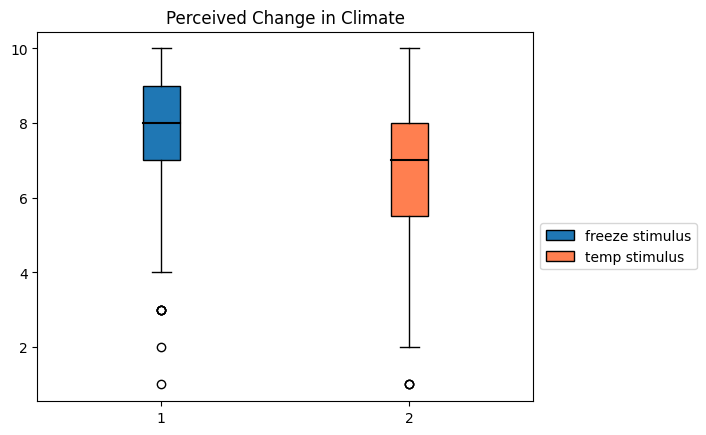

In [22]:
bp1 = plt.boxplot(exp_freeze_df['Climate'], positions=[1], patch_artist=True, boxprops=dict(facecolor="tab:blue"), medianprops = dict(color = "black", linewidth = 1.5))
bp2 = plt.boxplot(exp_temp_df['Climate'], positions=[2], patch_artist=True, boxprops=dict(facecolor="coral"), medianprops = dict(color = "black", linewidth = 1.5))
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['freeze stimulus', 'temp stimulus'],  bbox_to_anchor=(1, 0.5))
plt.title('Perceived Change in Climate')

C:\Users\grace\AppData\Local\Temp\ipykernel_16368\1334726928.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


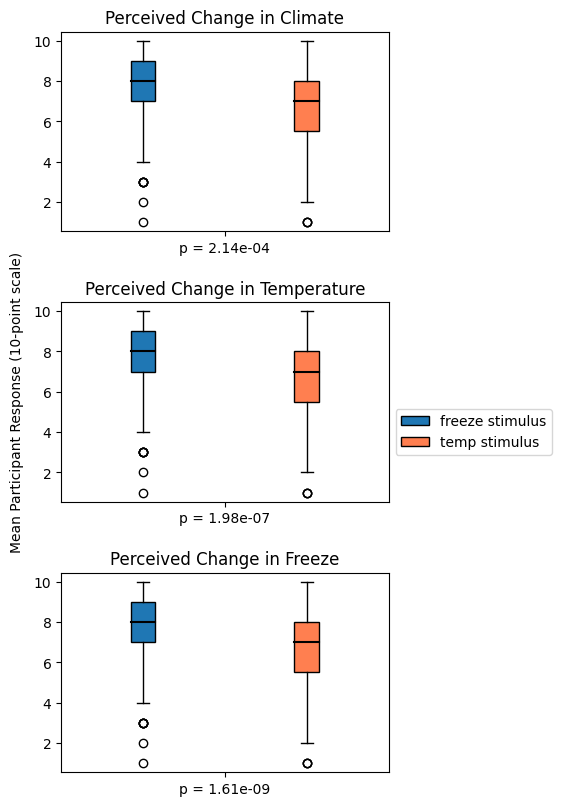

In [23]:
question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(3, figsize = (4, 8))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    mean_diff_freeze = exp_freeze_df[cat].mean()
    stderr_freeze = exp_freeze_df[cat].sem()
    mean_diff_temp = exp_temp_df[cat].mean()
    stderr_temp = exp_temp_df[cat].sem()
    p_value = stats.ttest_ind(exp_freeze_df[cat], exp_temp_df[cat])[1]
    
    bp1 = axs[i].boxplot(exp_freeze_df['Climate'], positions=[1], patch_artist=True, boxprops=dict(facecolor="tab:blue"), medianprops = dict(color = "black", linewidth = 1.5))
    bp2 = axs[i].boxplot(exp_temp_df['Climate'], positions=[2], patch_artist=True, boxprops=dict(facecolor="coral"), medianprops = dict(color = "black", linewidth = 1.5))
    axs[i].set_title('Perceived Change in ' + cat)
    axs[i].set_xticks((np.arange(1)+1.5), (('p = ' + '{:0.2e}'.format(p_value)),))
    
    i += 1
    
axs[1].legend([bp1["boxes"][0], bp2["boxes"][0]], ['freeze stimulus', 'temp stimulus'],  bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Participant Response (10-point scale)')

fig.show()

C:\Users\grace\AppData\Local\Temp\ipykernel_16368\3706444644.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


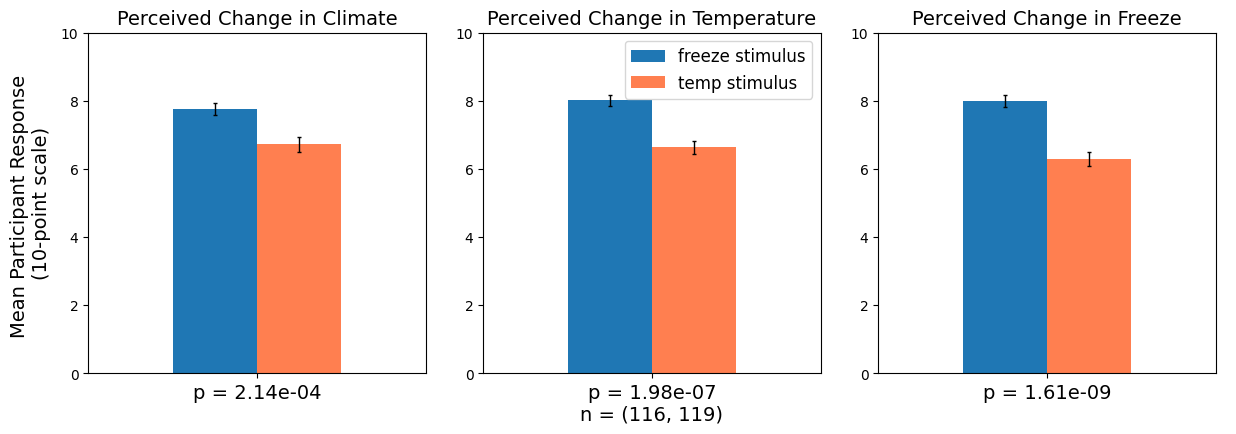

In [24]:
question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    mean_diff_freeze = exp_freeze_df[cat].mean()
    stderr_freeze = exp_freeze_df[cat].sem()
    mean_diff_temp = exp_temp_df[cat].mean()
    stderr_temp = exp_temp_df[cat].sem()
    p_value = stats.ttest_ind(exp_freeze_df[cat], exp_temp_df[cat])[1]
    temp_sample_size = len(exp_temp_df[cat])
    freeze_sample_size = len(exp_freeze_df[cat])
    
    width = .25
    axs[i].bar(.375, mean_diff_freeze, width, color = "tab:blue", label = "freeze stimulus")
    axs[i].errorbar(0.375, mean_diff_freeze, yerr = stderr_freeze, fmt="none", color = 'black', elinewidth = 1, capsize = 1.5)
    axs[i].bar(.625, mean_diff_temp, width, color = "coral", label = "temp stimulus")
    axs[i].errorbar(.625, mean_diff_temp, yerr = stderr_temp, fmt="none", color = 'black', elinewidth = 1, capsize = 1.5)
    axs[i].set_title('Perceived Change in ' + cat, fontsize=14)
    axs[i].set_xticks((np.arange(1)+0.5), (('p = ' + '{:0.2e}'.format(p_value)),), fontsize=14)
    if i == 1:
        axs[i].set_xticks((np.arange(1)+0.5), (('p = ' + '{:0.2e}'.format(p_value)+ '\nn = (' + str(freeze_sample_size) + ", " + str(temp_sample_size) + ')'),), fontsize=14)
    axs[i].set_ylim(0,10)
    axs[i].set_xlim(0,1)
    i += 1
    
axs[1].legend(fontsize=12) #loc = 'lower center', bbox_to_anchor=(0.5, -0.4)
plt.ylabel('Mean Participant Response \n(10-point scale)', fontsize=14)

fig.show()